In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

### 1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# we shall drop the carbin column since it containds the null values and its not of use
df = df.drop(columns = 'Cabin', axis = 1)

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [9]:
# fill the missing values with the mode since the observations are less and are non integers
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

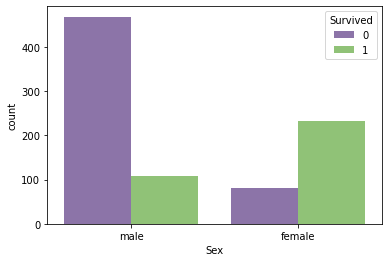

In [13]:
colors = ["#8c6bb1", "#8cce6b"]
sns.countplot(x ='Sex', hue = 'Survived', data = df, palette = colors)

In [14]:
df.skew(numeric_only = True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [15]:
df.kurtosis(numeric_only = True)

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.966279
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

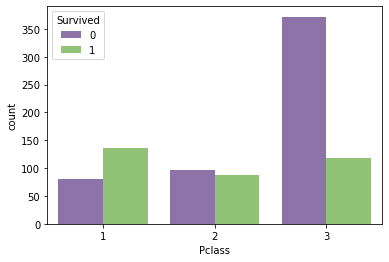

In [16]:
#count plot of pclasss column and relationship to the number iof surviers.
sns.countplot(x = 'Pclass',hue = 'Survived', data = df, palette = colors)

"""since 0 rep the no. of those who died and 1 viceversa, you will notice the death rate was higher in the 3rd class
categoty compared to first and second class. This could have been vrough dur to different reasons 
1. Increase no. of life boats in first class unlike all the other clases.
2.Higher no. of life jackets compared to the other classes.
3. Place of situation. I believe those in first class were situated in that part of the boat that was less exposed to dangers
incase of an emergency

"""

### LABEL ENCODING OF OUR DATA

In [17]:
# We shall encode all of our columns that are categorical so as to be able to work with them.We have 
# to replace the data into something binary or ASCII

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# we can replace the S, C and Q in embarked with 0, 1 and 2 respectively as well as encoding male and female to binaries 0 and 1 respectively

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


### we can break down or model simply to what our inputs will be and what is our target columns.Basically with prediction, in our case survival column is our target column and its whaat we will be looking for. The rest columns will act as our input

In [22]:
X = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
y = df['Survived']

In [23]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [24]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### we shall now split our data into a test set and train set 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
#split the data set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

### a train test of 0.2 basically means that  20 % of our whole data will be sued to test our model and the rest 80% is our training data.The more data we use to train our model with, the more accurate our model becomes. random_state = 2 breaks our data into two parts i.e train and test respectively.

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Logistic regression and model training.
### I choose logistic regression since its more applicable in our case since we have binary outputs either survuved or not, the this algorithm will be suitable in such a case.

In [29]:
model = LogisticRegression()

In [30]:
# use the train data on logistic regression model
model.fit(X_train, y_train)

LogisticRegression()

### Evaluation and testing of this model

In [31]:
X_train_prediction = model.predict(X_train)

In [32]:
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [33]:
# we can do the same with the test data. Also note the accuracy score and how good of a reading it is.
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data is :', training_data_accuracy)

Accuracy score of training data is : 0.8132022471910112


In [34]:
# check accuracy of test data
X_test_prediction = model.predict(X_test)

In [35]:
X_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [36]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data is :', test_data_accuracy)

Accuracy score of test data is : 0.7877094972067039


### We can coclude that the model looks quite okay interms of the metrtics it uses for prediction and testing

#### lets try something fun, checking if our model works perfectly through a window or deployment for satisfaction reasons. We shall be using ngrok in this project.Basically it provides a turnel that connect with your local machine, which can be useful for testing weghooks, APIs, or accesing your local server from remote locations. It generates a public URL that you can use to access your local server from anywhere. Isnt that wonderful!

In [37]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [38]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok

# Setup Ngrok with authtoken
ngrok.set_auth_token("2cwLmrzMCi7EWiJGcSBjvJLisgv_5zRmRzGgweLUKJPDR9qtt") #replace with your token uothentication from ngrok website

# Running Flask app
os.system("nohup python -m flask run --no-reload &")

# Opening Ngrok tunnel to the Flask app using http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

# Retrieve Ngrok's public URL here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Public URL: NgrokTunnel: "https://a299-2c0f-6300-211-4300-570-488d-e8d4-c33b.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

app = Flask(__name__)

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

@app.route('/')
def home():
    html_form = """
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-image: url('titanic.jpg'); /* Add your Titanic background image here */
            background-size: cover;
            background-position: center;
            margin: 0;
            padding: 0;
        }

        .container {
            max-width: 600px;
            margin: 50px auto;
            padding: 20px;
            background-color: rgba(255, 255, 255, 0.8);
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
        }

        h1 {
            text-align: center;
            color: #333;
        }

        form {
            margin-top: 20px;
        }

        label {
            display: block;
            margin-bottom: 5px;
            color: #333;
        }

        input[type="text"] {
            width: 100%;
            padding: 8px;
            margin-bottom: 10px;
            border-radius: 5px;
            border: 1px solid #ccc;
        }

        button {
            padding: 10px 20px;
            background-color: #007bff;
            color: white;
            border: none;
            border-radius: 5px;
            cursor: pointer;
        }

        button:hover {
            background-color: #0056b3;
        }

        #predictionResult {
            margin-top: 20px;
            padding: 10px;
            background-color: #f8d7da;
            color: #721c24;
            border-radius: 5px;
            display: none;
        }

        .survived {
            background-color: #d4edda;
            color: #155724;
        }

        .not-survived {
            background-color: #f8d7da;
            color: #721c24;
        }
    </style>
</head>

<body>
    <div class="container">
        <h1>Titanic Survival Prediction</h1>
        <form id="predictionform" method="post" action="/predict">
            <label for="pclass">Pclass:</label>
            <input type="text" id="pclass" name="pclass" required><br>

            <label for="sex">Sex (1 for male, 0 for female):</label>
            <input type="text" id="sex" name="sex" required><br>

            <label for="age">Age:</label>
            <input type="text" id="age" name="age" required><br>

            <label for="sibsp">SibSp:</label>
            <input type="text" id="sibsp" name="sibsp" required><br>

            <label for="parch">Parch:</label>
            <input type="text" id="parch" name="parch" required><br>

            <label for="fare">Fare:</label>
            <input type="text" id="fare" name="fare" required><br>

            <label for="embarked">Embarked (2 for S, 1 for Q, 0 for C):</label>
            <input type="text" id="embarked" name="embarked" required><br>

            <button type="button" onclick="predictSurvival()">Predict</button>
        </form>

        <div id="predictionResult"></div>
    </div>

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionform"));

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    var predictionResult = response.prediction === 1 ? "Survived" : "Not Survived";
                    var resultDiv = document.getElementById("predictionResult");
                    resultDiv.innerHTML = "Survival Prediction: " + predictionResult;
                    resultDiv.className = response.prediction === 1 ? "survived" : "not-survived";
                    resultDiv.style.display = "block";
                }
            };
            xhr.send(data);
        }
    </script>
</body>

</html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    try:
        pclass = int(request.form['pclass'])
        sex = int(request.form['sex'])
        age = float(request.form['age'])
        sibsp = int(request.form['sibsp'])
        parch = int(request.form['parch'])
        fare = float(request.form['fare'])
        embarked = int(request.form['embarked'])
        
        features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
        prediction = model.predict(features)[0]
        
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    public_url = ngrok.connect(addr='5000', proto='http')
    print("Public URL:", public_url)
    display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))
    
    app.run()


Public URL: NgrokTunnel: "https://b807-2c0f-6300-211-4300-570-488d-e8d4-c33b.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Feb/2024 12:52:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2024 12:52:05] "GET /titanic.jpg HTTP/1.1" 404 -
127.0.0.1 - - [27/Feb/2024 12:52:06] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\JIMMY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [27/Feb/2024 12:53:09] "POST /predict HTTP/1.1" 200 -
t=2024-02-27T15:50:18+0300 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=8ccf9bbc0817 clientid=c277d0a57ad3e226db95bd3c816c7811
t=2024-02-27T15:50:18+0300 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=4c333282c739 err="session closed"
t=2024-02-27T15:50:19+0300 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=4c333282c739 err="failed to dial ngrok server with address \"conn